In [17]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')


In [18]:
url = 'https://sports.news.naver.com/kbaseball/record/index?category=kbo&year='

In [19]:
df = pd.DataFrame([])

In [20]:
for i in range(2012,2022+1):
    df1=pd.read_html(url+str(i))[0]
    df1["연도"]=str(i)
    df=pd.concat([df, df1])    

In [21]:
df=df.replace({'kt':"KT","SK":'SSG','넥센':'키움'})

pivot() : 두 개의 열을 기준으로 행과 열을 재구성


pivot_table() : 교재에서 배운 함수, 데이터 집계 함수를 사용

In [22]:
df_pivot1=df.pivot(index='연도', columns='팀', values='순위')

In [23]:
df_pivot1=df_pivot1.fillna(0)
df_pivot1=df_pivot1.astype('int')

In [24]:
df_pivot1

팀,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
연도,,,,,,,,,,
2012,5,0,7,0,2,3,4,1,6,8
2013,8,0,3,7,6,2,5,1,4,9
2014,8,0,4,3,5,6,7,1,2,9
2015,7,10,9,3,5,1,8,2,4,6
2016,5,10,4,2,6,1,8,9,3,7
2017,1,10,6,4,5,2,3,9,7,8
2018,5,9,8,10,1,2,7,6,4,3
2019,7,6,4,5,3,1,10,8,2,9
2020,6,3,4,1,9,2,7,8,5,10


In [25]:
df_pivot2=df.pivot(index='연도', columns='순위', values='팀')

In [26]:
df_pivot2

순위,1,2,3,4,5,6,7,8,9,10
연도,,,,,,,,,,
2012,삼성,SSG,두산,롯데,KIA,키움,LG,한화,NaN,NaN
2013,삼성,두산,LG,키움,롯데,SSG,NC,KIA,한화,NaN
2014,삼성,키움,NC,LG,SSG,두산,롯데,KIA,한화,NaN
2015,두산,삼성,NC,키움,SSG,한화,KIA,롯데,LG,KT
2016,두산,NC,키움,LG,KIA,SSG,한화,롯데,삼성,KT
2017,KIA,두산,롯데,NC,SSG,LG,키움,한화,삼성,KT
2018,SSG,두산,한화,키움,KIA,삼성,롯데,LG,KT,NC
2019,두산,키움,SSG,LG,NC,KT,KIA,삼성,한화,롯데
2020,NC,두산,KT,LG,키움,KIA,롯데,삼성,SSG,한화


In [27]:
df_pivot3=df.pivot(index='연도', columns='팀', values='승률')

In [28]:
df_pivot3

팀,KIA,KT,LG,NC,SSG,두산,롯데,삼성,키움,한화
연도,,,,,,,,,,
2012,0.488,NaN,0.442,NaN,0.546,0.523,0.512,0.611,0.469,0.408
2013,0.408,NaN,0.578,0.419,0.496,0.568,0.532,0.595,0.571,0.331
2014,0.422,NaN,0.492,0.551,0.484,0.465,0.457,0.624,0.619,0.389
2015,0.465,0.364,0.451,0.596,0.486,0.549,0.462,0.611,0.545,0.472
2016,0.490,0.373,0.500,0.589,0.479,0.650,0.458,0.455,0.538,0.468
2017,0.608,0.347,0.489,0.560,0.524,0.596,0.563,0.396,0.486,0.430
2018,0.486,0.418,0.476,0.406,0.545,0.646,0.479,0.486,0.521,0.535
2019,0.437,0.500,0.552,0.514,0.615,0.615,0.340,0.420,0.601,0.403
2020,0.507,0.566,0.564,0.601,0.357,0.564,0.497,0.460,0.559,0.326


In [29]:
data = {'team': ['LG', '두산', '한화'],
        'marker_color': ['red', 'steelblue', 'orange'],
        'face_color': ['black', 'yellow', 'white']}

df_three_team = pd.DataFrame(data)

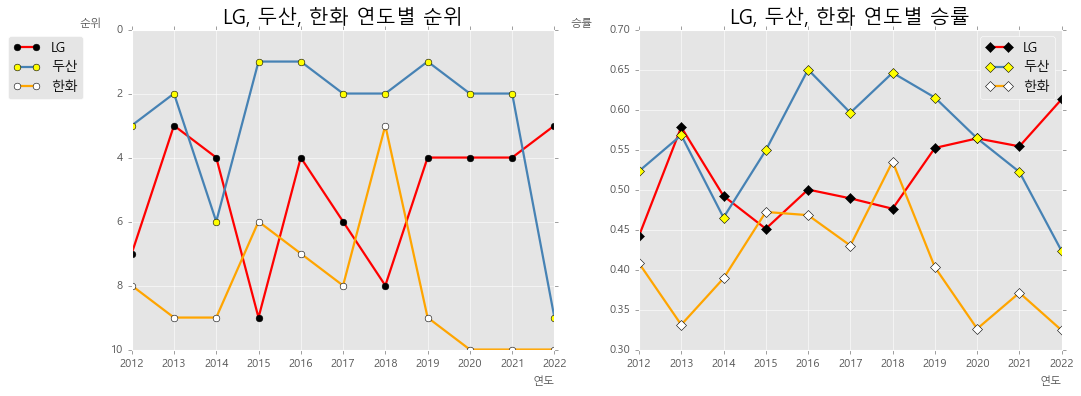

In [31]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 연도별 순위 / 승률
# LG, 두산, 한화
# ax1 -> 팀 순위 , ax2 -> 팀 승점

for team, marker_color, face_color in zip(df_three_team['team'],df_three_team['marker_color'], df_three_team['face_color']):
    
    ax1.plot(df_pivot1.index, df_pivot1[team], marker='o', color= marker_color, markerfacecolor=face_color,label=team)
    ax2.plot(df_pivot3.index, df_pivot3[team], marker='D', color= marker_color, markerfacecolor=face_color, label=team)
    
    #    print(team, marker_color, face_color)

# ax1.plot(df_pivot1.index, df_pivot1['LG'], marker='o', color='red',
#          markerfacecolor = 'black', label='LG')
# ax1.plot(df_pivot1.index, df_pivot1['두산'], marker='D', color='yellow',
#          markerfacecolor = 'steelblue',label='두산')
# ax1.plot(df_pivot1.index, df_pivot1['한화'], marker='s', color='orange',
#          markerfacecolor = 'white',label='한화')
ax1.set_ylim(10.0,0)
ax2.set_ylim(0.3,0.7)
ax1.legend(bbox_to_anchor=(-0.1,1))
ax2.legend(bbox_to_anchor=(1,1))
ax1.set_title('LG, 두산, 한화 연도별 순위',size=18)
ax2.set_title('LG, 두산, 한화 연도별 승률',size=18)
ax1.set_xlabel('연도', size=10 , loc= 'right')
ax1.set_ylabel('순위', rotation = 0, labelpad=8, size=10, loc='top')
ax2.set_xlabel('연도', size=10, loc= 'right')
ax2.set_ylabel('승률', rotation = 0, labelpad=15, size=10, loc='top')




plt.show()